# Pydantic with gemini

In [3]:
from dotenv import load_dotenv
import os
from google import genai

load_dotenv()

client = genai.Client(api_key=os.getenv("GOOGLE_API_KEY"))
response = client.models.generate_content(model="gemini-2.5-flash", contents= "Tell me a programing joke")

print(response.text)



Why do programmers always mix up Halloween and Christmas?

Because Oct 31 == Dec 25!


In [11]:
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents= """
    You are a helpful assistans. I need you to create a JSON object representing a libary.
    The libarys name is "Central City Library" and have the fealds name and books that contains a list of books.
    Each book shuld have a 'title', 'author' and 'year'. Make sure the output is a single, valid JSON object.
    Give me 10 books. Remove ```json and ``` from the output.
""")

response.text


'{\n  "name": "Central City Library",\n  "books": [\n    {\n      "title": "The Great Gatsby",\n      "author": "F. Scott Fitzgerald",\n      "year": 1925\n    },\n    {\n      "title": "To Kill a Mockingbird",\n      "author": "Harper Lee",\n      "year": 1960\n    },\n    {\n      "title": "1984",\n      "author": "George Orwell",\n      "year": 1949\n    },\n    {\n      "title": "Pride and Prejudice",\n      "author": "Jane Austen",\n      "year": 1813\n    },\n    {\n      "title": "The Catcher in the Rye",\n      "author": "J.D. Salinger",\n      "year": 1951\n    },\n    {\n      "title": "Moby Dick",\n      "author": "Herman Melville",\n      "year": 1851\n    },\n    {\n      "title": "War and Peace",\n      "author": "Leo Tolstoy",\n      "year": 1869\n    },\n    {\n      "title": "The Hobbit",\n      "author": "J.R.R. Tolkien",\n      "year": 1937\n    },\n    {\n      "title": "Crime and Punishment",\n      "author": "Fyodor Dostoevsky",\n      "year": 1866\n    },\n    {\

In [12]:
print(response.text)

{
  "name": "Central City Library",
  "books": [
    {
      "title": "The Great Gatsby",
      "author": "F. Scott Fitzgerald",
      "year": 1925
    },
    {
      "title": "To Kill a Mockingbird",
      "author": "Harper Lee",
      "year": 1960
    },
    {
      "title": "1984",
      "author": "George Orwell",
      "year": 1949
    },
    {
      "title": "Pride and Prejudice",
      "author": "Jane Austen",
      "year": 1813
    },
    {
      "title": "The Catcher in the Rye",
      "author": "J.D. Salinger",
      "year": 1951
    },
    {
      "title": "Moby Dick",
      "author": "Herman Melville",
      "year": 1851
    },
    {
      "title": "War and Peace",
      "author": "Leo Tolstoy",
      "year": 1869
    },
    {
      "title": "The Hobbit",
      "author": "J.R.R. Tolkien",
      "year": 1937
    },
    {
      "title": "Crime and Punishment",
      "author": "Fyodor Dostoevsky",
      "year": 1866
    },
    {
      "title": "One Hundred Years of Solitude",
 

## Using pydantic to validate the simulated data

In [15]:
from pydantic import BaseModel, Field
from datetime import datetime

class Book(BaseModel):
    title: str 
    author: str
    year: int = Field(gt=1000, lt=datetime.now().year)

class Libary(BaseModel):
    name: str
    books: list[Book]

libary = Libary.model_validate_json(response.text)

libary



Libary(name='Central City Library', books=[Book(title='The Great Gatsby', author='F. Scott Fitzgerald', year=1925), Book(title='To Kill a Mockingbird', author='Harper Lee', year=1960), Book(title='1984', author='George Orwell', year=1949), Book(title='Pride and Prejudice', author='Jane Austen', year=1813), Book(title='The Catcher in the Rye', author='J.D. Salinger', year=1951), Book(title='Moby Dick', author='Herman Melville', year=1851), Book(title='War and Peace', author='Leo Tolstoy', year=1869), Book(title='The Hobbit', author='J.R.R. Tolkien', year=1937), Book(title='Crime and Punishment', author='Fyodor Dostoevsky', year=1866), Book(title='One Hundred Years of Solitude', author='Gabriel García Márquez', year=1967)])

In [16]:
libary.name

'Central City Library'

In [17]:
libary.books

[Book(title='The Great Gatsby', author='F. Scott Fitzgerald', year=1925),
 Book(title='To Kill a Mockingbird', author='Harper Lee', year=1960),
 Book(title='1984', author='George Orwell', year=1949),
 Book(title='Pride and Prejudice', author='Jane Austen', year=1813),
 Book(title='The Catcher in the Rye', author='J.D. Salinger', year=1951),
 Book(title='Moby Dick', author='Herman Melville', year=1851),
 Book(title='War and Peace', author='Leo Tolstoy', year=1869),
 Book(title='The Hobbit', author='J.R.R. Tolkien', year=1937),
 Book(title='Crime and Punishment', author='Fyodor Dostoevsky', year=1866),
 Book(title='One Hundred Years of Solitude', author='Gabriel García Márquez', year=1967)]

In [18]:
libary.books[5]

Book(title='Moby Dick', author='Herman Melville', year=1851)

In [20]:
libary.books[5].title, libary.books[5].year

('Moby Dick', 1851)

In [22]:
titels = [book.title for book in libary.books]
titels

['The Great Gatsby',
 'To Kill a Mockingbird',
 '1984',
 'Pride and Prejudice',
 'The Catcher in the Rye',
 'Moby Dick',
 'War and Peace',
 'The Hobbit',
 'Crime and Punishment',
 'One Hundred Years of Solitude']

In [25]:
newer_book = [(book.title, book.year) for book in libary.books if book.year > 1950]
newer_book

[('To Kill a Mockingbird', 1960),
 ('The Catcher in the Rye', 1951),
 ('One Hundred Years of Solitude', 1967)]

In [28]:
libary.model_dump()

{'name': 'Central City Library',
 'books': [{'title': 'The Great Gatsby',
   'author': 'F. Scott Fitzgerald',
   'year': 1925},
  {'title': 'To Kill a Mockingbird', 'author': 'Harper Lee', 'year': 1960},
  {'title': '1984', 'author': 'George Orwell', 'year': 1949},
  {'title': 'Pride and Prejudice', 'author': 'Jane Austen', 'year': 1813},
  {'title': 'The Catcher in the Rye', 'author': 'J.D. Salinger', 'year': 1951},
  {'title': 'Moby Dick', 'author': 'Herman Melville', 'year': 1851},
  {'title': 'War and Peace', 'author': 'Leo Tolstoy', 'year': 1869},
  {'title': 'The Hobbit', 'author': 'J.R.R. Tolkien', 'year': 1937},
  {'title': 'Crime and Punishment',
   'author': 'Fyodor Dostoevsky',
   'year': 1866},
  {'title': 'One Hundred Years of Solitude',
   'author': 'Gabriel García Márquez',
   'year': 1967}]}

In [29]:
libary.model_dump_json()

'{"name":"Central City Library","books":[{"title":"The Great Gatsby","author":"F. Scott Fitzgerald","year":1925},{"title":"To Kill a Mockingbird","author":"Harper Lee","year":1960},{"title":"1984","author":"George Orwell","year":1949},{"title":"Pride and Prejudice","author":"Jane Austen","year":1813},{"title":"The Catcher in the Rye","author":"J.D. Salinger","year":1951},{"title":"Moby Dick","author":"Herman Melville","year":1851},{"title":"War and Peace","author":"Leo Tolstoy","year":1869},{"title":"The Hobbit","author":"J.R.R. Tolkien","year":1937},{"title":"Crime and Punishment","author":"Fyodor Dostoevsky","year":1866},{"title":"One Hundred Years of Solitude","author":"Gabriel García Márquez","year":1967}]}'

In [34]:
with open("libary.json", "w") as json_file:
    json_file.write(libary.model_dump_json(indent=4))

## Create pandas dataframe

In [40]:
import pandas as pd

titels = [book.title for book in libary.books]
year = [book.year for book in libary.books]
authors = [book.author for book in libary.books]

df = pd.DataFrame({
    "titel": titels,
    "year": year,
    "author": authors
})



<Axes: title={'center': 'Books per year'}, ylabel='Frequency'>

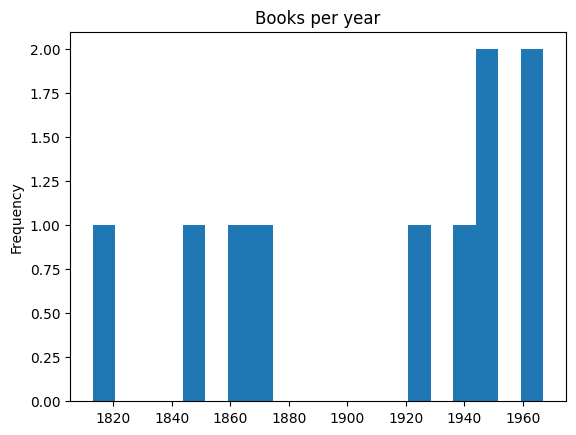

In [41]:
df["year"].plot(kind = "hist", title="Books per year", bins=20)